In [24]:
#%% Import libraries
import numpy as np
from scipy.integrate import solve_ivp
#from sympy import *
# from sympy.physics.mechanics import ReferenceFrame
from IPython.display import display, Latex, Math
#init_printing(use_latex='mathjax')

from sys import path
path.append(
    "c:\\Users\\diego\\Dropbox\\Academic\\MEng Space Systems\\3. DOCA\\ADCS functions")
import ADCS_Functions as adcs
import ADCS_Functions_sym as adcs_sym


### Stability analysis of attitude motion  (three coupled linear differential equations)

In [25]:
def stability_analysis(time, x, w, I1, I2, I3):
    """
    Stability analysis of attitude motion  (three coupled linear differential equations).

    In matrix form x'' = A x' + B x

    For stability I2>I1>I3
    """
    ## Variables
    theta = np.array([x[0], x[1], x[2]])
    dottheta = np.array([x[3], x[4], x[5]])

    ## Initialize
    A = np.array([[0, 0, ((I1-I2+I3)*w)/I1],
                  [0, 0, 0], 
                  [((I1-I2+I3)*w)/I3, 0, 0]])
    dotx_arr = np.array([dottheta[0], dottheta[1], dottheta[2]])

    B = np.array([[(4*w**2*(I2-I3))/I1, 0, 0],
                  [0, -(3*w**2*(I1-I3))/I2, 0], 
                  [0, 0, (w**2*(I2-I1))/I3]])
    theta_arr = np.array([theta[0], theta[1], theta[2]])


    ## Diff equations
    dotdot_theta1 = A @ dotx_arr + B @ theta_arr

    sols = np.concatenate((dotdot_theta1, dotx_arr), axis=None)
    return sols


In [26]:
time = np.linspace(0, 100, 101)
ics = np.array([0.2, 0.1, 0.1, 0.0, 0.0, 0.0])
w = 0.1
I1, I2, I3 = 15, 20, 10

Stable


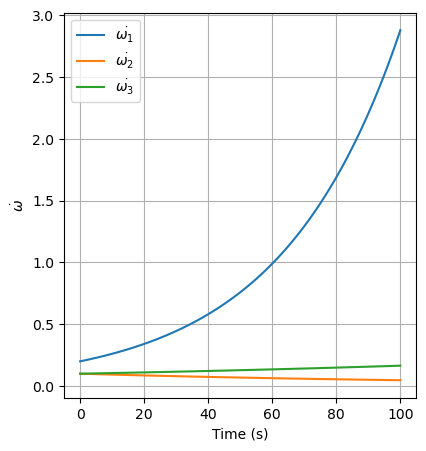

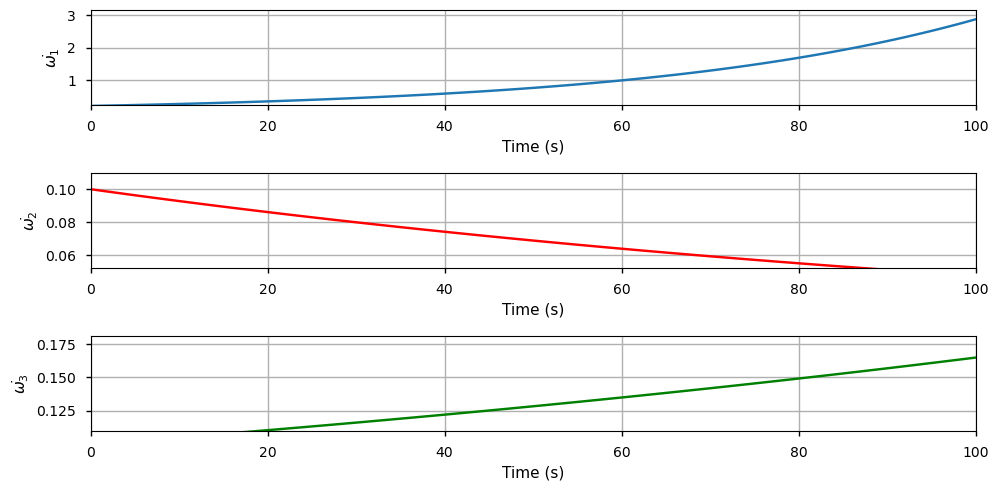

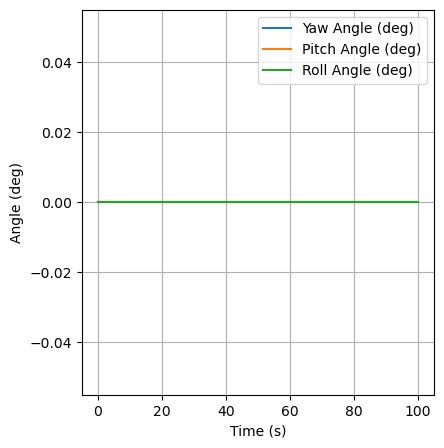

c:\Users\diego\Dropbox\Academic\MEng Space Systems\3. DOCA\ADCS functions\ADCS_Functions.py:130: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  plt.ylim(min(dot_angles[0, :])*1.1, max(dot_angles[0, :])*1.1)
c:\Users\diego\Dropbox\Academic\MEng Space Systems\3. DOCA\ADCS functions\ADCS_Functions.py:138: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  plt.ylim(min(dot_angles[1, :])*1.1, max(dot_angles[1, :])*1.1)
c:\Users\diego\Dropbox\Academic\MEng Space Systems\3. DOCA\ADCS functions\ADCS_Functions.py:146: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  plt.ylim(min(dot_angles[2, :])*1.1, max(dot_angles[2, :])*1.1)


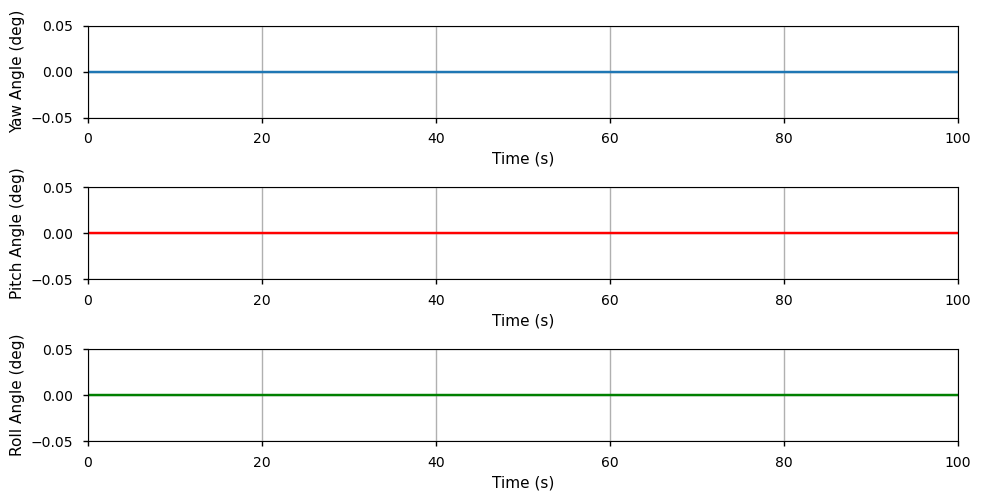

(array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100.]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.,

In [27]:
adcs.solve_stability_analysis(ics, w, I1, I2, I3, time_range=[
                              0, 100], time_array=np.linspace(0, 100, 101), plot=True)
